<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Authors: Matt Brems (DC), Marc Harper (LA), Charles Rice (RUH)_

---

<a id="learning-objectives"></a>
### Learning Objectives 
- Understand modeling, inference from models, and prediction
- Understand the framework of regression modeling
- Understand simple linear regression and linear relationships between variables
- Learn how to find the best slope and intercept for simple linear regression
- Be able to interpret the results of simple linear regression
- Understand the assumptions that simple linear regression makes

### Lesson Guide

- [Naive/Baseline Prediction](#naivebaseline-prediction)
- [Linear Regression Basics](#basics)
- [Interpretation of SLR](#interpretation-of-slr)
- [Assumptions of SLR](#assumptions-of-slr)
- [Final notes on linear regression](#final-notes-on-linear-regression)
- [Categorical predictors](#categorical-predictors)


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

## Introduction

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

The objective of the competition is to predict total ridership of Capital Bikeshare in any given hour.

Demand forecasting is a common data science application. If we can predict the quantity of demand, total ridership in a given hour, we can create analytical tools to improve the bikeshare system. 
Some applications would be:
* Find where to site new bikeshare stations and know how large of a station to build.
* Calculate the expected wear and tear on bikes and what the replacement costs will be.
* Sometimes bikeshare stations have no bikes or are completely full and prevent use of the station. With a slightly different research design we can forecast full and empty stations and send a service vehicle to "rebalance" the bikes from one station to another.

In [52]:
# Let's read in the data with date as index for the new dataframe
url = './datasets/bikeshare.csv'
bikes = 

### Data Dictionary

| Variable| Description |
|---------|----------------|
|datetime| hourly date + timestamp  |
|season|  1 = spring, 2 = summer, 3 = fall, 4 = winter |
|holiday| whether the day is considered a holiday|
|workingday| whether the day is neither a weekend nor holiday|
|weather| 1: Clear, 2: Mist, 3: Light Snow 4: Heavy Rain|
|temp| temperature in Celsius|
|atemp| "feels like" temperature in Celsius|
|humidity| relative humidity|
|windspeed| wind speed|
|casual| number of non-registered user rentals initiated|
|registered| number of registered user rentals initiated|
|count| number of total rentals|

In [53]:
#bikes.shape

In [54]:
# bikes.dtypes

In [14]:
# Use the .rename() method to rename count to total, since 'count' is a python method


In [55]:
# bikes.head()

In [56]:
# bikes.isnull().sum()

In [17]:
# our Q is : how many bikes will be used or rentals for givin point of time

<a id="naivebaseline-prediction"></a>
## Naive/Baseline Prediction
---
Even if we know very little about our data and can only use a single variable, we can still make a prediction about the demand for bicycles.

In general, we're going to be comparing our models against other models, but we'll also be comparing our models to something like random chance. This is what we call our 'naive' or 'baseline' prediction.

It's naive because it doesn't consider any other factors than the central tendency of the data. In this case, we're looking at the mean of the total number of rentals per hour.

In [ ]:
# check data


### Let's look at our data

In [ ]:
### Plot the data 
## feature : temp , target : total

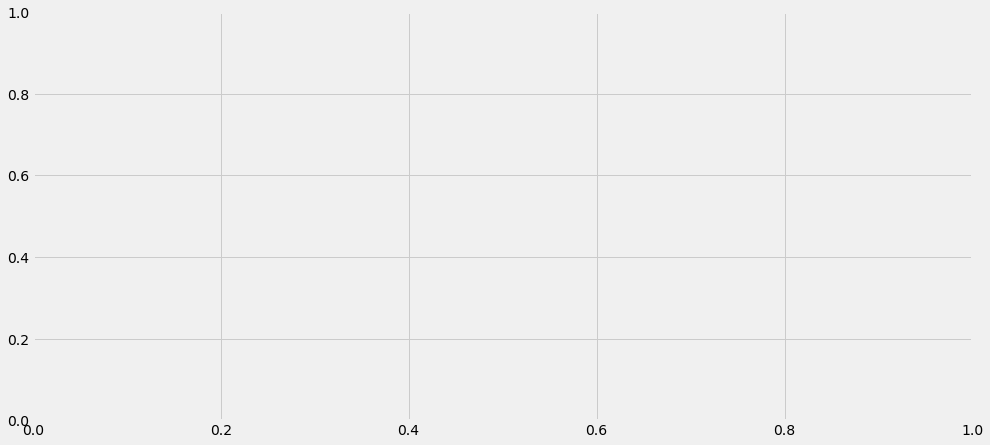

In [57]:
# create a figure
fig = plt.figure(figsize=(15,7))

# get current axis of that figure
ax = plt.gca()


### Take a look at that plot, particularly the baseline estimate. Does it really look like it captures our data? Why or why not?

#### Sadly, our optic nerve is not good enough to make a real recommendation on the number of bicycles to keep on hand because

![Estimating coefficients](./images/dataaa.jpg)

**1. We want to find the best number of bikes to keep on hand per hour given a temperature for the hour **  

which means that  

**2. We need some numerical criterion on which to judge our predictions and optimize our models.**

### ** Question: why is taking tests an important part of human learning and education? **

---
<a id="overview-of-supervised-learning"></a>
## Overview of supervised learning


![Supervised learning diagram](./images/supervised_learning.png)

In supervised learning, we 'teach' our algorithms by seeing how wrong we are - how different our predictions are from a known ground truth - and work to reduce that wrongness.  

We call the difference between our estimation or prediction and the ground truth a 'residual.'

<a id="residuals"></a>
### Residuals

The difference between the true value of $Y$ and the predicted value of $Y$ (denoted $\hat{Y}$, "Y-hat") is known as a "residual." We calculate a residual as $Y_i - \hat{Y}_i$ and denote each residual as $\varepsilon_i$.

**Note that the residual $\varepsilon_i$ is the same as the error in our modeled linear relationship!**

For every value of $i$ from 1 to $n$, we:
- have an observed $X_i$.
- have an observed $Y_i$.
- can calculate a predicted value $\hat{Y}_i$, which is equal to $f(X_i)$, where $f$ is our model.
- can calculate a residual $\varepsilon_i$, which is equal to $Y_i - \hat{Y}_i$.

<a id="residual-sum-of-squares-rss"></a>
### Residual sum of squares (RSS)

The most common way to define the "best fit line" is one that forces our residuals (a.k.a. errors) will be as close to zero as possible.

In fact, we seek to minimize the *sum of squared residuals* or [residual sum of squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares).

### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

This is also known as a **loss function**, where the "loss" here is the sum of squared residuals. (It's called a loss function because it represents the accuracy we lose by using a model, rather than reality (e.g, the total population)

## NOTE:  
### Residual Sum of Squares (RSS)  =  Sum of Squared Errors (SSE)  =  Sum of Squared Residuals (SSR)  

## Evaluating the Baseline
---
Now that we have a term for it, let's take a look at how our baseline prediction for bike useage did.

### We could add up all the squared errors (called 'sum of squared errors' or SSE)
### $$ \sum_{i=1}^n(Y_i-\hat{Y_i})^2 $$

In [58]:
# Calculate SSE
sse = 

### We can also take the average of our errors, the Mean Squared Error (MSE)
### $$ \frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2 $$

In [59]:
# Calculate MSE
mse = 

In [60]:
# Let's take a look at our original scatter plot. 
fig

## So how do we capture all (or at least more) of the data above the red line?

## [Linear Regression Basics](#basics)

---
There are two varieties of Linear Regression: Simple Linear Regression and Multi-Variable Linear Regression.

Both equations have a **dependent variable**, often denoted $y$; **independent variable(s)** often denoted $x$; and a **constant**, commonly referred to as the y-intercept.    

_Simple linear regression (SLR) has one independent variable._  
_Multivariable (MLR) has potentially infinite independent variables._

### Form of linear regression

Simple LR uses one feature and a constant to represent a relationship with another feature.
### $y = \alpha + \beta X +\epsilon_i $ 

but you might know it as
### $ y = mx + b$

And we can extend the simple linear regression into the multiple linear regression (more on this later):
### $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon_i$

- $y$ is the response (the target/outcome/dependent variable)
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature/independet variable)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature/independent)
- $\epsilon_i$ is the constant error

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are finding the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response and draw inferences about the relationships between variables and the outcome.

![Estimating coefficients](./images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

<a id="minimizing-the-mse"></a>
### Minimizing the MSE

For simple linear regression [we can derive the intercept and slope that minimize the RSS algebraically](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line). 

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

The equations for the intercept and slope that minimize the RSS is:

### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$

Our simple linear regression is an **estimator of the expected value (mean) of $Y$**.

> **Note:** Estimators are mathematical functions or formulas that yield an *estimate*. For example, an estimator might be the sample mean whereas the estimate is the value of the sample mean from our data set.

<a id="calculate-beta-coefficients-by-hand"></a>
### Calculate beta coefficients (a.k.a. "fit" model) by hand

In [100]:
# implement linear regrission using equ

In [35]:
# X (feature), y(target)


In [45]:
# y mean , x mean


In [46]:
# y std , x std


In [47]:
# correlation coefficient between observed  X and  y


In [49]:
# intercept , coeff


In [50]:
# predict with model


In [104]:
# calculate MSE
mse_lin =

**How does our new MSE compare to our old MSE?**

#### We can now plot our line

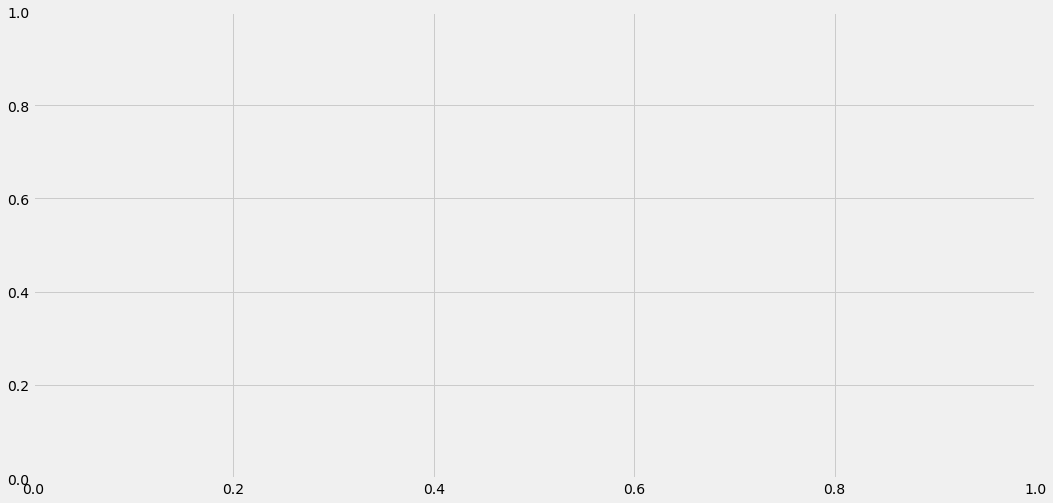

In [61]:
# create a figure
fig = plt.figure(figsize=(16,8))
# get the axis of that figure
ax = plt.gca()



<a id="interpretation-of-slr"></a>
## Interpretation of SLR

---

Suppose I believe that commute time, my $Y$, is best modeled as a linear function of the number of Metro stops I take. Then, my model is:
### $$ [commute] = \beta_0 + \beta_1 [Metro\_stops] $$

I want to estimate this model from our data. I gather data over a long period of time and put it into a Pandas dataframe with a column for commute time and a column for number of Metro stops. Then, my estimate of the true model is:

### $$ \hat{[commute]} = \hat{\beta}_0 + \hat{\beta}_1 [Metro\_stops] $$

Let's say that $\hat{\beta}_0$ is 5 and $\hat{\beta}_1$ is 3.
- I interpret $\hat{\beta}_1$ by saying "As the number of Metro stops increases by 1, I expect commute time to increase by three minutes."
- I interpret $\hat{\beta}_0$ by saying "If someone travels zero stops on the Metro, I expect commute time to be five minutes."

The simple linear regression estimators described above have really nice properties:

1. They are unbiased. (a.k.a. the statistics will on average equal the true parameter value)
2. Among all unbiased estimators, the estimators above have the smallest possible variance.
3. They are consistent. (a.k.a. as your sample size n goes to infinity, the statistic converges to the true parameter value)

**However, these are just mathematical properties.** They do not take into account real-world situations. For example, suppose I want to use a SLR model to predict my commute time and I get the model:

    [commute time] = 8 * [number of Metro stops] - 10

In this case, my commute time is estimated to be negative if I go zero stops or one stop on the Metro. If I were to interpret my intercept, I might say "If I travel zero Metro stops on my way to work, I expect to commute -10 minutes." Of course, this is nonsense; you can't have a negative commute time!

**What this means:** 

When building a model, make sure your model makes sense! You are responsible for the interpretation of the model. All the computer will do is optimize. You may not do anything wrong when you fit a model (and you won't get an error!), but make a note that there are shortcomings to the framework.

## Recap
1. We covered the types of modeling, and the types of machine learning problem
2. We walked through a general process of building and primitively evaluating a model
3. And we implemented a simple (one feature) linear regression with sklearn